# Aula 1 - Análise de Dados com Pandas

In [58]:
import pandas as pd

print(f'Pandas: {pd.__version__}')

Pandas: 3.0.0


In [59]:
df = pd.read_csv('data/salaries.csv')

In [60]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [61]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  str    
 2   employment_type     133349 non-null  str    
 3   job_title           133349 non-null  str    
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  str    
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  str    
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  str    
 10  company_size        133349 non-null  str    
dtypes: float64(1), int64(3), str(7)
memory usage: 11.2 MB


In [62]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [63]:
df.shape

(133349, 11)

In [64]:
linhas, colunas = df.shape[0], df.shape[1]
print(f'Número de linhas: {linhas}.\nNúmero de colunas: {colunas}.')

Número de linhas: 133349.
Número de colunas: 11.


In [65]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='str')

In [66]:
df.columns = ['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd', 'residencia', 'remoto', 'empresa', 'tamanho_empresa']
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='str')

In [67]:
df['senioridade'].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [68]:
df['contrato'].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [69]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [70]:
df['tamanho_empresa'].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [71]:
mapeamento_senioridade = {
    'EN': 'Junior',
    'MI': 'Pleno',
    'SE': 'Senior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].map(mapeamento_senioridade)
df['senioridade'].value_counts()

senioridade
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [72]:
mapeamento_contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].map(mapeamento_contrato)
df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64

In [73]:
mapeamento_tamanho_empresa = {
    'S': 'Pequeno',
    'M': 'Médio',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].map(mapeamento_tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
Médio      129561
Grande       3574
Pequeno       214
Name: count, dtype: int64

In [74]:
mapeamento_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].map(mapeamento_remoto)
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [75]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [76]:
df.describe(include='object')

/tmp/ipykernel_133344/87514550.py:1: Pandas4Warning:

For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.



,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [77]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Preparação e Limpeza dos Dados

In [78]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [79]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [80]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [81]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [82]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [83]:
import numpy as np
print(f'Numpy: {np.__version__}')

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

Numpy: 2.4.1


,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [84]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, 28, np.nan, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill() # Dá para usar bfill também
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,28.0,28.0
3,Quinta,NaN,28.0
4,Sexta,27.0,27.0


In [85]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidades': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidades'].fillna('Não informado')
df_cidades

,nome,cidades,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [86]:
df_limpos = df.dropna()

In [87]:
df_limpos.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [88]:
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [89]:
df_limpos.info()

<class 'pandas.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  str    
 2   contrato         133339 non-null  str    
 3   cargo            133339 non-null  str    
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  str    
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  str    
 8   remoto           133339 non-null  str    
 9   empresa          133339 non-null  str    
 10  tamanho_empresa  133339 non-null  str    
dtypes: float64(1), int64(2), str(8)
memory usage: 12.2 MB


In [90]:
df_limpos = df_limpos.assign(ano=df_limpos['ano'].astype('int64'))

In [91]:
df_limpos.info()

<class 'pandas.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ano              133339 non-null  int64
 1   senioridade      133339 non-null  str  
 2   contrato         133339 non-null  str  
 3   cargo            133339 non-null  str  
 4   salario          133339 non-null  int64
 5   moeda            133339 non-null  str  
 6   usd              133339 non-null  int64
 7   residencia       133339 non-null  str  
 8   remoto           133339 non-null  str  
 9   empresa          133339 non-null  str  
 10  tamanho_empresa  133339 non-null  str  
dtypes: int64(3), str(8)
memory usage: 12.2 MB


In [92]:
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


# Aula 3 - Visualização de Dados

Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [93]:
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

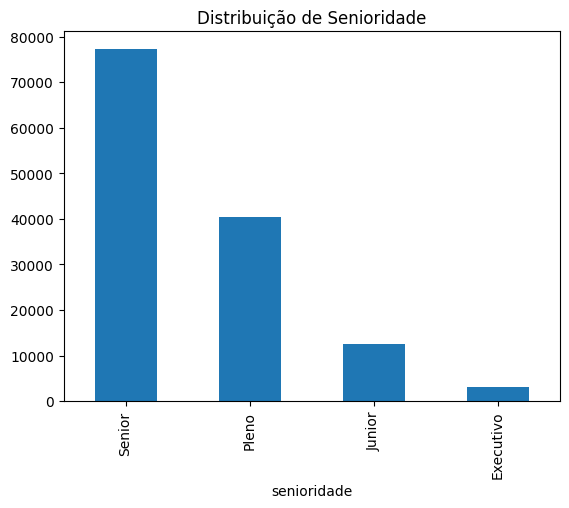

In [94]:
df_limpos['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [95]:
import seaborn as sns

print(f'Seaborn: {sns.__version__}')

Seaborn: 0.13.2


<Axes: xlabel='senioridade', ylabel='usd'>

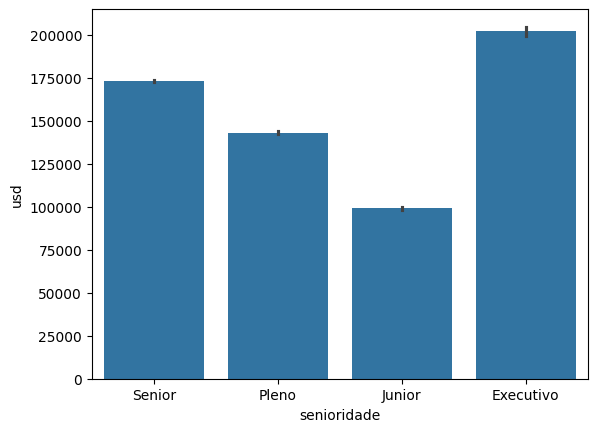

In [96]:
sns.barplot(data=df_limpos, x='senioridade', y='usd')

In [97]:
import matplotlib
import matplotlib.pyplot as plt

print(f'Matplotlib: {matplotlib.__version__}')

Matplotlib: 3.10.8


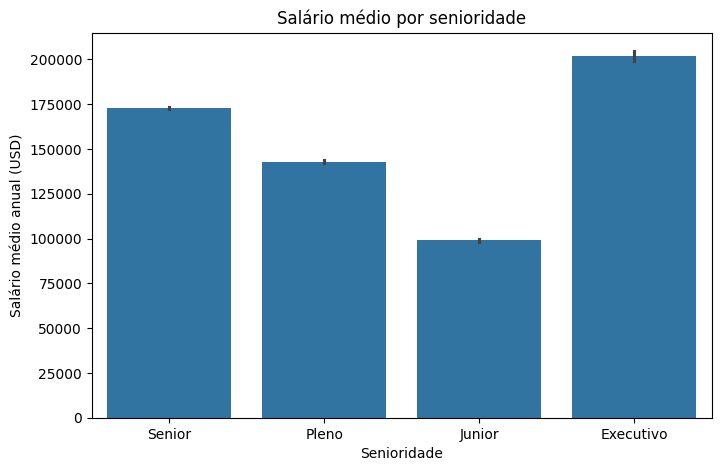

In [98]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpos, x='senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [99]:
df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [100]:
ordem = df_limpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='str', name='senioridade')

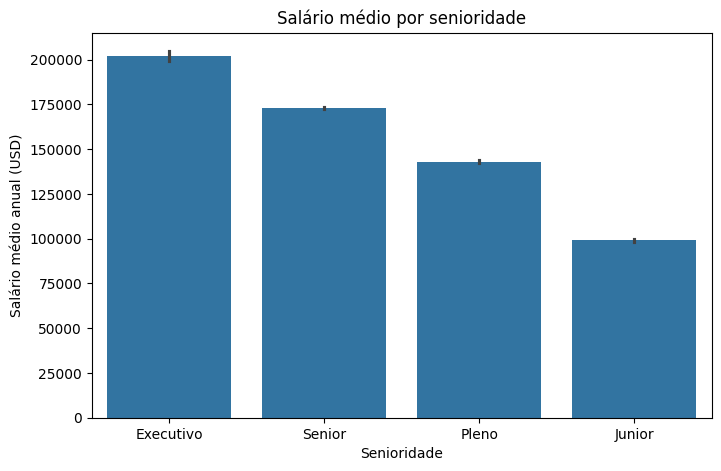

In [101]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpos, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

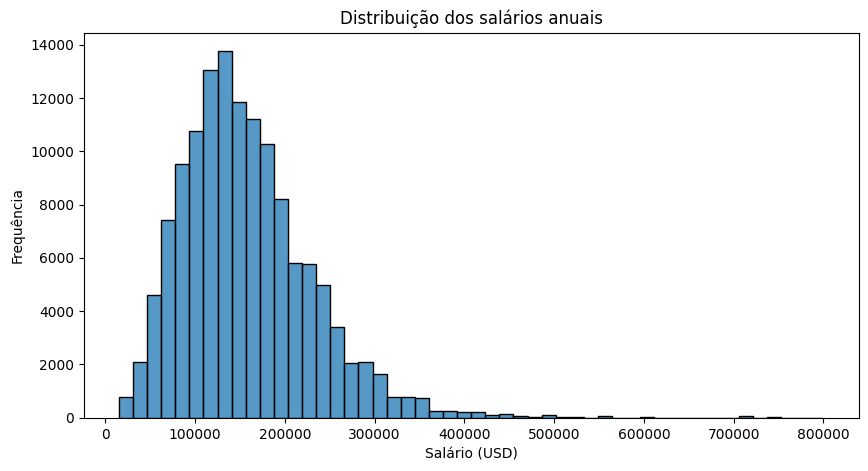

In [102]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpos['usd'], bins=50, kde=False)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()

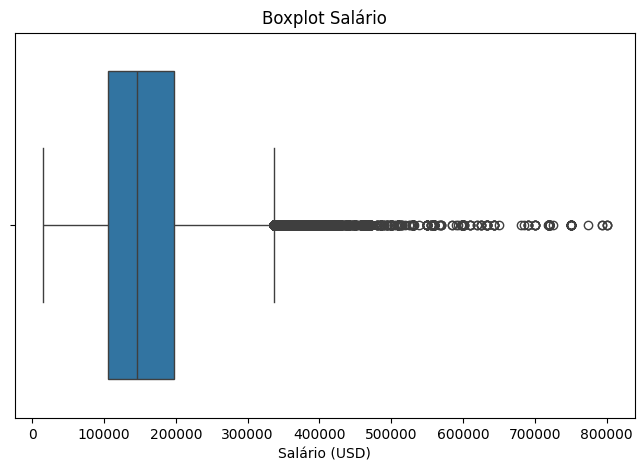

In [103]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpos['usd'])
plt.title('Boxplot Salário')
plt.xlabel('Salário (USD)')
plt.show()

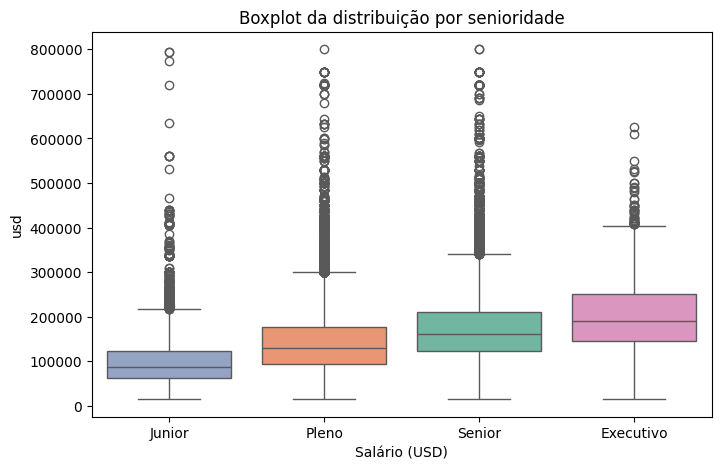

In [104]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpos, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot da distribuição por senioridade')
plt.xlabel('Salário (USD)')
plt.show()

In [105]:
import plotly
import plotly.express as px

print(f'Plotly: {plotly.__version__}')

Plotly: 6.5.2


In [106]:
# %pip install -U nbformat

In [107]:
fig = px.bar(
    df_limpos.groupby('senioridade')['usd'].mean().reset_index(),
    x='senioridade',
    y='usd',
    category_orders={'senioridade': ordem_senioridade},
    title='Salário médio por senioridade',
    labels={'usd': 'Salário médio anual (USD)', 'senioridade': 'Senioridade'},
    color='senioridade'
)
fig.show()

In [108]:
remoto_contagem = df_limpos['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos tipos de trabalho'
)
fig.show()

In [109]:
remoto_contagem = df_limpos['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    hole=0.5
)
fig.show()

In [110]:
remoto_contagem = df_limpos['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    hole=0.5
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [111]:
print('Fim da aula 3')

Fim da aula 3


# Aula 4 - Geração de mapa

In [112]:
import pycountry

In [115]:
# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None
    
# Criar nova coluna com código ISO-3
df_limpos['residencia_iso3'] = df_limpos['residencia'].apply(iso2_to_iso3)

df_ds = df_limpos[df_limpos['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(
    media_ds_pais,
    locations='residencia_iso3',
    color='usd',
    color_continuous_scale='rdylgn',
    title='Salário médio para Cientista de Dados por país',
    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'}
)
fig.show()

In [116]:
df_limpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [117]:
df_limpos.to_csv('dados-imersao-final.csv', index=False)